In [996]:
#Capstone Project Data Cleaning Plan
#import dependencies
#load data into dataframe
#Drop columns we don't need: timestamp, level, tag, race, education (race and education have already been onehot-encoded in datasource)
#Check data types
#Look for outlier values
#Check for duplicate rows

#Investigate and clean specific columns:
    #

In [997]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [998]:
#Set path of input file
file_path = "Resources/Levels_Fyi_Salary_Data.csv"

In [999]:
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [1000]:
#Check for duplicate rows
duplicate_rows_df = salaries_df[salaries_df.duplicated()]
print(duplicate_rows_df.shape)
#There are no duplicate columns

(0, 28)


In [1001]:
#Drop unneeded columns
#Race and Education have already been encoded in other columns, many rows don't have data for them though
salaries_df = salaries_df.drop(columns=['level','tag','Race','Education'])
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,9/13/2018 8:23,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,9/13/2018 14:35,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,9/16/2018 16:10,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1002]:
#Check data types
salaries_df.dtypes
#Why is dmaid a float, seems like it should be an int, look into that
#all other types seem reasonable

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
dtype: object

In [1003]:
#look for null values
salaries_df.isnull().sum()

timestamp                      0
company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
dtype: int64

In [1004]:
#try to figure out why dmaid came in as a float, and has two null values
salaries_df['dmaid'].unique()
#no values seem to have anything after the decimal, but NaN is among the values

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
        nan, 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 555., 571., 538., 693., 651., 744., 634., 525.,
       546., 754., 630., 624., 866., 554., 600., 565., 542., 550., 540.,
       632., 734., 520., 881., 509., 522., 612., 531., 804., 577., 759.,
       516., 673., 574., 537., 760., 698., 658.])

In [1005]:
#convert timestamp field to datetime - is currently object
salaries_df['timestamp'] = pd.to_datetime(salaries_df['timestamp'])
salaries_df['timestamp']

0       2017-06-07 11:33:00
1       2017-06-10 17:11:00
2       2017-06-11 14:53:00
3       2017-06-17 00:23:00
4       2017-06-20 10:58:00
                ...        
62637   2018-09-09 11:52:00
62638   2018-09-13 08:23:00
62639   2018-09-13 14:35:00
62640   2018-09-16 16:10:00
62641   2019-01-29 05:12:00
Name: timestamp, Length: 62642, dtype: datetime64[ns]

In [1006]:
#look into NaN value in dmaid
dmaid_nan = salaries_df.loc[pd.isna(salaries_df['dmaid'])]
dmaid_nan
#Two rows have NaN for dmaid, small enough number to fix manually. 

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
14919,2020-01-13 16:19:00,CACI,Software Engineer,63000,"Rome, NY",1.0,1.0,63000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
49136,2021-04-21 20:02:00,General Motors,Hardware Engineer,94000,"Troy, MI",3.0,3.0,86000,0.0,8000.0,...,0,0,0,0,0,0,0,0,0,0


In [1007]:
#Find the dmaid for Troy, MI
find_troy_dmaid = salaries_df.loc[salaries_df['location']=="Troy, MI"]
find_troy_dmaid[['location','dmaid']]

,location,dmaid
36366,"Troy, MI",505.0
36390,"Troy, MI",505.0
39640,"Troy, MI",505.0
43507,"Troy, MI",505.0
49136,"Troy, MI",NaN
58529,"Troy, MI",505.0


In [1008]:
#Find the dmaid for Rome, NY
find_romeny_dmaid = salaries_df.loc[salaries_df['location']=="Rome, NY"]
find_romeny_dmaid[['location','dmaid']]

,location,dmaid
14919,"Rome, NY",NaN
50922,"Rome, NY",555.0


In [1009]:
#Fix dmaid for row 49136 to be 505 for Troy, MI

salaries_df.at[49136,'dmaid']=505
salaries_df.iloc[49136]['dmaid']


505.0

In [1010]:
#Fix dmaid for row 14919 to be 555 for Rome, NY

salaries_df.at[14919,'dmaid']=555
salaries_df.iloc[14919]['dmaid']

555.0

In [1011]:
#Now check unique values for dmaid again
salaries_df['dmaid'].unique()

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
       555., 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 571., 538., 693., 651., 744., 634., 525., 546.,
       754., 630., 624., 866., 554., 600., 565., 542., 550., 540., 632.,
       734., 520., 881., 509., 522., 612., 531., 804., 577., 759., 516.,
       673., 574., 537., 760., 698., 658.])

In [1012]:
#Check out 5 NaN values in company
company_nan = salaries_df.loc[pd.isna(salaries_df['company'])]
company_nan

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1403,2018-09-23 15:53:00,NaN,Software Engineering Manager,292000,"Austin, TX",15.0,4.0,250000,0.0,42000.0,...,0,0,0,0,0,0,0,0,0,0
8579,2019-07-11 07:28:00,NaN,Software Engineer,85000,"Atlanta, GA",2.0,0.0,85000,0.0,8000.0,...,0,0,0,0,0,0,0,0,0,0
9045,2019-07-23 20:47:00,NaN,Software Engineer,47000,"Melbourne, VI, Australia",2.0,1.0,47000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26999,2020-08-19 01:49:00,NaN,Software Engineer,113000,"Dublin, DN, Ireland",5.0,1.0,113000,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
29433,2020-09-09 17:52:00,NaN,Software Engineer,54000,"Arlington, VA",3.0,2.0,54000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [1013]:
#look to see if everyone in Austin is at the same company
austin_tx = salaries_df.loc[salaries_df['location']=="Austin, TX"]
austin_tx
#They are at a bunch of different companies,the same is true in the other 4 cities. Rather than try to 
#guess at a company for them, let's drop these 5 rows

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
178,2018-02-16 10:49:00,IBM,Software Engineer,84000,"Austin, TX",3.0,3.0,80000,100.0,4000.0,...,0,0,0,0,0,0,0,0,0,0
436,2018-06-07 16:48:00,IBM,Product Manager,103000,"Austin, TX",0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
491,2018-06-16 05:29:00,Dell Technologies,Software Engineer,225000,"Austin, TX",14.0,14.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2018-06-21 22:11:00,IBM,Software Engineer,83000,"Austin, TX",3.0,3.0,82000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
526,2018-06-25 13:45:00,IBM,Software Engineer,110000,"Austin, TX",8.0,3.0,108000,0.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62229,2018-11-30 13:33:00,Indeed,Product Manager,180000,"Austin, TX",4.0,2.5,158000,0.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62254,2019-06-15 12:55:00,Dell Technologies,Software Engineering Manager,205000,"Austin, TX",10.0,10.0,160000,0.0,40000.0,...,0,0,0,0,0,0,0,0,0,0
62258,2019-06-25 12:50:00,Arm,Software Engineer,133000,"Austin, TX",3.0,2.0,104500,0.0,28500.0,...,0,0,0,0,0,0,0,0,0,0
62431,2018-04-29 19:27:00,Amazon,Software Engineer,144000,"Austin, TX",0.0,0.0,106000,65000.0,66000.0,...,0,0,0,0,0,0,0,0,0,0


In [1014]:
#Drop 5 rows where company is NaN
salaries_df.drop(company_nan.index,inplace=True)
salaries_df
#count of 62,637 is correct

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1015]:
#There are 2 rows where the original location is Tel Aviv, Israel, with no state given. 
salaries_df.loc[salaries_df['location']=='Tel Aviv, Israel']

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
9061,2019-07-24 06:42:00,PayPal,Data Scientist,89000,"Tel Aviv, Israel",0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9075,2019-07-24 12:49:00,JPMorgan Chase,Software Engineer,120000,"Tel Aviv, Israel",15.0,2.0,120000,0.0,10000.0,...,0,0,0,0,0,0,0,0,0,0


In [1016]:
#Change the location to Tel Aviv, Tel Aviv, Israel. Tel Aviv seems to be in Tel Aviv province in Israel
salaries_df['location'] = np.where(salaries_df["location"]=='Tel Aviv, Israel','Tel Aviv, Tel Aviv, Israel',salaries_df["location"])
salaries_df.loc[salaries_df["location"]=='Tel Aviv, Tel Aviv, Israel']

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
9061,2019-07-24 06:42:00,PayPal,Data Scientist,89000,"Tel Aviv, Tel Aviv, Israel",0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9075,2019-07-24 12:49:00,JPMorgan Chase,Software Engineer,120000,"Tel Aviv, Tel Aviv, Israel",15.0,2.0,120000,0.0,10000.0,...,0,0,0,0,0,0,0,0,0,0


In [1017]:
#Fix NaN values in gender columns
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if x=='Title: Senior Software Engineer' else x)
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if pd.isna(x) else x)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1018]:
#Check value counts for gender column
salaries_df["gender"].value_counts()

Male      35698
none      19540
Female     6999
Other       400
Name: gender, dtype: int64

In [1019]:
salaries_df.company.value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [1020]:
#Verify that null values are fixed
#look for null values
salaries_df.isnull().sum()

timestamp                  0
company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

In [1021]:
#Look for outlier values in numeric columns
#Look at boolean columns first
print(salaries_df["Masters_Degree"].value_counts())
print(salaries_df["Bachelors_Degree"].value_counts())
print(salaries_df["Doctorate_Degree"].value_counts())
print(salaries_df["Highschool"].value_counts())
print(salaries_df["Some_College"].value_counts())
print(salaries_df["Race_Asian"].value_counts())
print(salaries_df["Race_White"].value_counts())
print(salaries_df["Race_Two_Or_More"].value_counts())
print(salaries_df["Race_Black"].value_counts())
print(salaries_df["Race_Hispanic"].value_counts())
#There are no funny values in the Boolean columns

0    47246
1    15391
Name: Masters_Degree, dtype: int64
0    50034
1    12603
Name: Bachelors_Degree, dtype: int64
0    60834
1     1803
Name: Doctorate_Degree, dtype: int64
0    62317
1      320
Name: Highschool, dtype: int64
0    62282
1      355
Name: Some_College, dtype: int64
0    50865
1    11772
Name: Race_Asian, dtype: int64
0    54606
1     8031
Name: Race_White, dtype: int64
0    61833
1      804
Name: Race_Two_Or_More, dtype: int64
0    61947
1      690
Name: Race_Black, dtype: int64
0    61508
1     1129
Name: Race_Hispanic, dtype: int64


In [1022]:
#Does everyone have a value for race and education?
row_count = salaries_df.count()['rowNumber']
total_education_count = salaries_df.sum()['Masters_Degree'] + salaries_df.sum()['Bachelors_Degree'] +salaries_df.sum()['Doctorate_Degree'] + salaries_df.sum()['Highschool'] + salaries_df.sum()['Some_College']   
print(f"The total number of rows with data in the education columns is {total_education_count} out of {row_count} rows.")
total_race_count = salaries_df.sum()['Race_Asian'] + salaries_df.sum()['Race_White'] +salaries_df.sum()['Race_Two_Or_More'] + salaries_df.sum()['Race_Black'] + salaries_df.sum()['Race_Hispanic']   
print(f"The total number of rows with data in the race columns is {total_race_count} out of {row_count} rows.")
#So we are missing a lot of data in gender, race, and education

C:\Users\mgsri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


The total number of rows with data in the education columns is 30472 out of 62637 rows.


C:\Users\mgsri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


The total number of rows with data in the race columns is 22426 out of 62637 rows.


In [1023]:
#calculate descriptive statistics for the total annual compensation column only
salaries_df['totalyearlycompensation'].describe().apply(lambda x: format(x, '.2f'))

count      62637.00
mean      216308.20
std       138034.13
min        10000.00
25%       135000.00
50%       188000.00
75%       264000.00
max      4980000.00
Name: totalyearlycompensation, dtype: object

In [1024]:
salaries_df["basesalary"].describe().apply(lambda x: format(x, '.2f'))

count      62637.00
mean      136689.43
std        61367.70
min            0.00
25%       108000.00
50%       140000.00
75%       170000.00
max      1659870.00
Name: basesalary, dtype: object

In [1025]:
salaries_df['totalyearlycompensation'].head()

0    127000
1    100000
2    310000
3    372000
4    157000
Name: totalyearlycompensation, dtype: int64

array([[<AxesSubplot:title={'center':'totalyearlycompensation'}>,
        <AxesSubplot:title={'center':'basesalary'}>]], dtype=object)

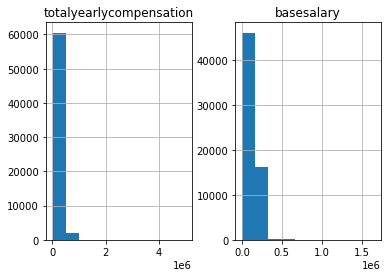

In [1026]:
#Look at the distribution of values for totalyearlycompensation and base salary
salaries_df.hist(column = ["totalyearlycompensation", "basesalary"])

In [1027]:
#Try a different way to explore the distribution of salaries in the dataset
x = salaries_df["rowNumber"]
y = salaries_df["totalyearlycompensation"]

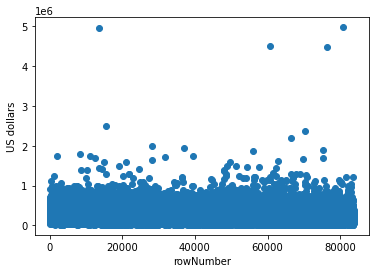

In [1028]:
plt.scatter(x, y)

# Labeling the plot and showing it
plt.xlabel('rowNumber')
plt.ylabel('US dollars')
plt.show()

<AxesSubplot:>

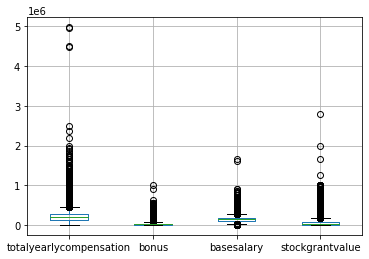

In [1029]:
salaries_df.boxplot(column = ["totalyearlycompensation","bonus",'basesalary','stockgrantvalue'])
#There appear to be some high outlier values in totalyearlycompensation, and maybe stockgrantvalue

In [1030]:
#Look at rows where base salary is zero
base_zero = salaries_df.loc[salaries_df['basesalary']==0]
base_zero

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,2017-06-22 23:08:00,Microsoft,Software Engineer,120000,"Redmond, WA",3.0,1.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,2017-07-03 19:28:00,Microsoft,Product Manager,150000,"Redmond, WA",10.0,10.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11007,2019-09-17 00:07:00,Apple,Software Engineer,240000,"Cupertino, CA",10.0,5.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14957,2020-01-14 16:53:00,Facebook,Software Engineer,195000,"Menlo Park, CA",3.0,1.0,0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
14974,2020-01-14 21:41:00,IBM,Software Engineer,240000,"San Francisco, CA",15.0,10.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14979,2020-01-14 23:09:00,Spotify,Software Engineer,310000,"New York, NY",9.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1031]:
#Look at values of bonus and stock in base salary=zero rows 
print(base_zero.sum()["bonus"])
print(base_zero.sum()["stockgrantvalue"])
bonus_not_zero = base_zero.loc[base_zero['bonus']>0]
bonus_not_zero


98000.0
192000.0


C:\Users\mgsri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\mgsri\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
2175,2018-10-28 16:30:00,Bank of America Merrill Lynch,Data Scientist,156000,"Charlotte, NC",20.0,15.0,0,10000.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
3406,2018-12-27 08:17:00,T-Mobile,Software Engineer,78000,"Bothell, WA",0.0,0.0,0,0.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
4458,2019-02-21 22:27:00,SAP,Software Engineer,140000,"Bellevue, WA",7.0,1.0,0,0.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
5129,2019-03-21 20:28:00,Facebook,Software Engineer,191000,"Seattle, WA",9.0,4.0,0,150000.0,32000.0,...,0,0,0,0,0,0,0,0,0,0
6534,2019-05-17 01:10:00,Salesforce,Software Engineer,178000,"New York, NY",5.0,4.0,0,11000.0,25000.0,...,0,0,0,0,0,0,0,0,0,0
10767,2019-09-13 23:32:00,Citrix Systems Inc,Product Manager,50000,"Bengaluru, KA, India",13.0,2.0,0,0.0,5000.0,...,0,0,0,0,0,0,0,0,0,0


In [1032]:
#drop rows where base is zero and bonus and/or stock >0
salaries_df.drop(bonus_not_zero.index,inplace=True)

#drop rows where stock is zero and bonus and/or stock >0
#these two groups amount to only 7 rows that just have wonky amounts that don't add up, so they are just bad data
base_zero = salaries_df.loc[salaries_df['basesalary']==0]
stock_not_zero =base_zero.loc[base_zero['stockgrantvalue']>0]
salaries_df.drop(stock_not_zero.index,inplace=True)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1033]:
#For rows where basesalary = 0, set equal to totalyearlycompensation
#Cleaning up basesalary column so everyone has a value in there
salaries_df['basesalary'] = np.where(salaries_df["basesalary"]==0,salaries_df["totalyearlycompensation"],salaries_df["basesalary"])
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-06-17 00:23:00,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1034]:
#check that no one has zero in base salary now
base_zero = salaries_df.loc[salaries_df['basesalary']==0]
base_zero

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic


In [1035]:
#Does anyone have a zero in total yearly compensation? No
total_zero = salaries_df.loc[salaries_df['totalyearlycompensation']==0]
total_zero

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic


In [1036]:
#Look at salary columns after zeroes fixed
print(salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f')))
print(salaries_df['totalyearlycompensation'].describe().apply(lambda x: format(x, '.2f')))

count      62630.00
mean      145200.52
std        63794.64
min         1000.00
25%       111000.00
50%       142000.00
75%       172000.00
max      1659870.00
Name: basesalary, dtype: object
count      62630.00
mean      216316.80
std       138038.40
min        10000.00
25%       135000.00
50%       188000.00
75%       264000.00
max      4980000.00
Name: totalyearlycompensation, dtype: object


In [1037]:
#Create a function to look for outliers
#copied from https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python-893f963cc0c0
def findoutliers(column):
    outliers = []
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
           outliers.append(out1) 
    return np.array(outliers)

In [1038]:
#look for outliers in 4 salary columns
row_count = salaries_df.count()['rowNumber']
totalcomp_outliers_count = len(findoutliers(salaries_df.totalyearlycompensation))
bonus_outliers_count = len(findoutliers(salaries_df.bonus))
base_outliers_count = len(findoutliers(salaries_df.basesalary))
stock_outliers_count = len(findoutliers(salaries_df.stockgrantvalue))
print(f" There are {totalcomp_outliers_count} ({totalcomp_outliers_count/float(row_count)*100}%) outliers in the totalyearlycompensation column")
print(f" There are {bonus_outliers_count} ({bonus_outliers_count/float(row_count)*100}%) outliers in the bonus column")
print(f" There are {base_outliers_count} ({base_outliers_count/float(row_count)*100}%) outliers in the basesalary column")
print(f" There are {stock_outliers_count} ({stock_outliers_count/float(row_count)*100}%) outliers in the stockgrantvalue column")

 There are 3133 (5.002395018361808%) outliers in the totalyearlycompensation column
 There are 2604 (4.157751876097716%) outliers in the bonus column
 There are 2155 (3.4408430464633564%) outliers in the basesalary column
 There are 4683 (7.4772473255628285%) outliers in the stockgrantvalue column


In [1039]:
#Look at maximum values for these four columns
print(f"The max value in the totalyearlycompensation column is {salaries_df.totalyearlycompensation.max()}.")
print(f"The max value in the bonus column is {salaries_df.bonus.max()}.")
print(f"The max value in the basesalary column is {salaries_df.basesalary.max()}.")
print(f"The max value in the stockgrantvalue column is {salaries_df.stockgrantvalue.max()}.")
#These values are high but not unreasonable in this field. I think we should keep them.

The max value in the totalyearlycompensation column is 4980000.
The max value in the bonus column is 1000000.0.
The max value in the basesalary column is 1659870.
The max value in the stockgrantvalue column is 2800000.0.


In [1040]:
#Make a dataframe where all outlier values are removed

#code adapted from https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

#create a function that returns a dataframe containing the rows with outlier values and not just the outliers
def list_outliers(df):
    q1=df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    print(f"The IQR lower boundary is {lower_limit} and the IQR upper boundary is {upper_limit}.")
    return outliers

In [1041]:
#Delete total pay outliers
totalpay_outliers = pd.DataFrame(list_outliers(salaries_df['totalyearlycompensation']))
salaries_df.drop(totalpay_outliers.index,inplace=True)

#Delete bonus pay outliers
bonus_outliers = pd.DataFrame(list_outliers(salaries_df['bonus']))
salaries_df.drop(bonus_outliers.index,inplace = True)
salaries_df

#Delete base pay outliers
base_outliers = pd.DataFrame(list_outliers(salaries_df['basesalary']))
salaries_df.drop(base_outliers.index,inplace = True)
salaries_df

#Delete stock outliers
stock_outliers = pd.DataFrame(list_outliers(salaries_df['stockgrantvalue']))
salaries_df.drop(stock_outliers.index,inplace = True)


print(f"Rows dropped: {len(totalpay_outliers)} outliers in totalyearly compensation")
print(f"              {len(bonus_outliers)} outliers in bonus compensation")
print(f"              {len(base_outliers)} outliers in base pay")
print(f"              {len (stock_outliers)} outliers in stock")
print(f"Total rows dropped: {len(totalpay_outliers) + len(bonus_outliers) + len(base_outliers)  + len(stock_outliers)}")
      
salaries_df
#salaries_no_outliers_df

The IQR lower boundary is -58500.0 and the IQR upper boundary is 457500.0.
The IQR lower boundary is -35000.0 and the IQR upper boundary is 61000.0.
The IQR lower boundary is 27500.0 and the IQR upper boundary is 247500.0.
The IQR lower boundary is -90000.0 and the IQR upper boundary is 150000.0.
Rows dropped: 3133 outliers in totalyearly compensation
              1748 outliers in bonus compensation
              2159 outliers in base pay
              2514 outliers in stock
Total rows dropped: 9554


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,208000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1042]:
#Look at salary columns after outliers removed
print(salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f')))
print(salaries_df['totalyearlycompensation'].describe().apply(lambda x: format(x, '.2f')))


count     53076.00
mean     134561.27
std       41165.99
min       28000.00
25%      110000.00
50%      136000.00
75%      160000.00
max      247000.00
Name: basesalary, dtype: object
count     53076.00
mean     182967.21
std       74371.49
min       15000.00
25%      130000.00
50%      175000.00
75%      230000.00
max      450000.00
Name: totalyearlycompensation, dtype: object


In [1043]:
#Stockgrantvalue has some weird low values, between .0001 and .01. Check other 3 salary columns for the same thing
total_under1 = salaries_df[(salaries_df['totalyearlycompensation']<10) & (salaries_df['totalyearlycompensation']>0)]
print(f" There were {total_under1.count()['rowNumber']} values between 0 and 10 for total salary")
bonus_under1 = salaries_df[(salaries_df['bonus']<10) & (salaries_df['bonus']>0)]
print(f" There were {bonus_under1.count()['rowNumber']} values between 0 and 10 for bonus salary")
base_under1 = salaries_df[(salaries_df['basesalary']<10) & (salaries_df['basesalary']>0)]
print(f" There were {base_under1.count()['rowNumber']} values between 0 and 10 for base salary")
stock_under1 = salaries_df[(salaries_df['stockgrantvalue']<10) & (salaries_df['stockgrantvalue']>0)]
print(f" There were {stock_under1.count()['rowNumber']} values between 0 and 10 for stockgrantvalue")



 There were 0 values between 0 and 10 for total salary
 There were 0 values between 0 and 10 for bonus salary
 There were 0 values between 0 and 10 for base salary
 There were 2 values between 0 and 10 for stockgrantvalue


In [1044]:
#Fix stockgrantvalue for two very small values
salaries_df['stockgrantvalue'] = salaries_df['stockgrantvalue'].map(lambda x:0 if x<0.01 else x)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,208000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1045]:
#The location field for the companies in south korea had 3 commas, fixing that here
salaries_df['location'] = salaries_df['location'].map(lambda x:'Seoul, Korea, South' if x=='Seoul, KG, Korea, South' else x)
salaries_df['location'] = salaries_df['location'].map(lambda x:'Suwon, Korea, South' if x=='Suwon, KG, Korea, South' else x)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,208000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,0,0,0
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,0,0,0
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,0,0,0
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,0,0,0


In [1046]:
#Split location into city, state, country values
location_list = salaries_df['location'].str.split(',\s+',expand=True)
location_list.columns = ['city','state','country']
location_list

,city,state,country
0,Redwood City,CA,None
1,San Francisco,CA,None
2,Seattle,WA,None
4,Mountain View,CA,None
5,Seattle,WA,None
...,...,...,...
62637,Seattle,WA,None
62638,Redmond,WA,None
62639,Seattle,WA,None
62640,San Francisco,CA,None


In [1047]:
#Add city, state, country columns back into main dataframe
salaries_df = pd.concat([salaries_df,location_list],axis=1)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,Redwood City,CA,None
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,San Francisco,CA,None
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,Seattle,WA,None
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,Mountain View,CA,None
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,208000,0.0,0.0,...,0,0,0,0,0,0,0,Seattle,WA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,Seattle,WA,None
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,Redmond,WA,None
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,Seattle,WA,None
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,San Francisco,CA,None


In [1048]:
#Fill USA in for country columm for US companies 
salaries_df['country'].fillna('USA', inplace=True)
salaries_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,100000,0.0,0.0,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,...,0,0,0,0,0,0,0,Seattle,WA,USA
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,157000,0.0,0.0,...,0,0,0,0,0,0,0,Mountain View,CA,USA
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,"Seattle, WA",8.5,8.5,208000,0.0,0.0,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [1049]:
#For rowNumbers 9061 and 9075, change state to Tel Aviv (Tel Aviv seems to be in the Tel Aviv province of Israel)
#For rowNumbers 9061 and 9075, change country to IS
salaries_df.iloc[9061]

timestamp                  2019-09-23 18:46:00
company                                 Google
title                        Software Engineer
totalyearlycompensation                 163000
location                            Austin, TX
yearsofexperience                          5.0
yearsatcompany                             0.0
basesalary                              110000
stockgrantvalue                        36000.0
bonus                                  17000.0
gender                                    none
cityid                                   10965
dmaid                                    635.0
rowNumber                                15279
Masters_Degree                               0
Bachelors_Degree                             0
Doctorate_Degree                             0
Highschool                                   0
Some_College                                 0
Race_Asian                                   0
Race_White                                   0
Race_Two_Or_M

In [1050]:
#Drop the original location column since we now have city, state, country split out from it
salaries_df = salaries_df.drop(['location'], axis=1)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
4,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
5,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [1051]:
salaries_df.country.value_counts()

USA                     44723
India                    1898
Canada                   1743
United Kingdom           1103
Germany                   570
                        ...  
Netherlands Antilles        1
Moldova                     1
Panama                      1
Vietnam                     1
Trinidad and Tobago         1
Name: country, Length: 73, dtype: int64

In [1052]:
#Write cleaned data to output file
salaries_df.to_csv("Resources/Cleaned_Salary_Data.csv",index=False)

In [1053]:
# Load dependencies for Linear Regression
from sklearn.linear_model import LinearRegression

In [1054]:
file_path = "Resources/Cleaned_Salary_Data.csv"

In [1055]:
#Read input file into a new DataFrame
new_salaries_df = pd.read_csv(file_path)
new_salaries_df.head(10)

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
5,2017-06-22 12:37:00,Microsoft,Software Engineering Manager,300000,15.0,11.0,180000,65000.0,55000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
6,2017-06-22 13:55:00,Microsoft,Software Engineer,156000,4.0,4.0,135000,8000.0,13000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
7,2017-06-22 23:08:00,Microsoft,Software Engineer,120000,3.0,1.0,120000,0.0,0.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
8,2017-06-26 21:25:00,Microsoft,Software Engineer,201000,12.0,6.0,157000,26000.0,28000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
9,2017-06-30 16:29:00,Salesforce,Software Engineering Manager,450000,16.0,3.0,230000,100000.0,45000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [1056]:
#Make a subset of the clean data for the US only
# Drop rows where country is not "USA"
us_salaries_df = new_salaries_df[new_salaries_df.country == 'USA']
us_salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53071,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
53072,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
53073,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
53074,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [1057]:
us_salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count     44723.00
mean     143719.73
std       34686.54
min       28000.00
25%      120000.00
50%      143000.00
75%      165000.00
max      247000.00
Name: basesalary, dtype: object

In [1058]:
salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count     53076.00
mean     134561.27
std       41165.99
min       28000.00
25%      110000.00
50%      136000.00
75%      160000.00
max      247000.00
Name: basesalary, dtype: object

In [1059]:
#write us salaries to a csv file

us_salaries_df.to_csv("Resources/US_Salary_Cleaned.csv",index=False)


In [1060]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
X = us_salaries_df.yearsofexperience.values.reshape(-1, 1)

In [1061]:
X[:5]

array([[1.5],
       [5. ],
       [8. ],
       [5. ],
       [8.5]])

In [1062]:
# The shape of X is 52,837 rows, with a single feature (column)
X.shape

(44723, 1)

In [1063]:
y = us_salaries_df.totalyearlycompensation
len (y)

44723

In [1064]:
# Create a model with scikit-learn
model = LinearRegression()

In [1065]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [1066]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(44723,)


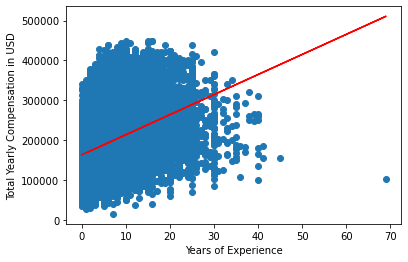

In [1067]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

#font1 = {'family':'serif','color':'blue','size':20}
#plt.title('US Salaries by Years of Experience', fontdict = font1)

plt.xlabel('Years of Experience')
plt.ylabel('Total Yearly Compensation in USD')
plt.show()

In [1068]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[5040.07989279]
163190.93036726242


In [1069]:
#Check the correlation coefficent (r) to determine if the regression model can be used to predict salaries in the US based on years of experience
# r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# See https://www.w3schools.com/python/python_ml_linear_regression.asp
from scipy import stats

X = us_salaries_df.yearsofexperience
y = us_salaries_df.totalyearlycompensation

slope, intercept, r, p, std_err  = stats.linregress(X, y)
print(r)

0.3988315462056804


In [1070]:
# r = 0.44 (r2=0.19) is a weak correlation, this model could use improvement. 
#Other features may be better at predicting salaries than years of experience.  Outliers may be imapcting the model to some extent. 

In [1071]:
#doublecheck r calculation another way, yep, it was right
r = np.corrcoef(X,y)
r

array([[1.        , 0.39883155],
       [0.39883155, 1.        ]])